# 1. Theorical Knowledge of the Problem

GAN is a class of models whose goal is to generate fake data that resembles real data. GAN stands for Generative Adversarial Networks, which means a generative adversarial network. We propose a new framework for estimating generative models via an adversarial process, in which we simultaneously train two models: a generative model $G$ that captures the data distribution, and a discriminative model $D$ that estimates the probability that a sample came from the training data rather than $G$.

![alt text](https://www.simplilearn.com/ice9/free_resources_article_thumb/GAN.PNG)

- **Generator**: Learns how to generate fake data to fool the Discriminator model. To fool the Discriminator, the output generated by the model must be really good. Therefore, the image quality must be as realistic as possible.

- **Discriminator**: Learns how to distinguish between fake data generated by the Generator model and real data. The Discriminator is like a teacher who grades the Generator to see if the way it generates data is sophisticated enough to fool the Discriminator and if not, the Generator needs to continue learning to create more realistic images. At the same time, the Discriminator must also improve its ability to distinguish because the quality of images generated by the Generator is becoming more and more realistic. Through the training process, both the Generator and the Discriminator improve their abilities.

## 1.1. Generator

A generator is essentially a generative model that takes as input a set of randomly initialized noise vectors $\mathbf{z}$ according to a Gaussian distribution. From a random input vector set $\mathbf{z}$, the generator model is a deep learning network ($G$ generator) that transforms the output image into a fake image. This fake image will be used as input for the Discriminator architecture.

![alt text](https://www.visinf.tu-darmstadt.de/media/visinf/vi_research/generative_header_0x570.png)

## 1.2. Discriminator

The Discriminator model will be used to distinguish whether the input image is real or fake. The model label will be real if the input image of the Discriminator is taken from the training set and fake if it is taken from the output of the Generator model. In essence, this is a common binary classification problem. To calculate the probability distribution for the output of the Discriminator, we use the sigmoid function.

![alt text](https://viso.ai/wp-content/uploads/2024/07/generative-ai-gans.png)

# 2. Adversarial Networks

The adversarial modeling framework provides an intuitive way to implement generative models when both the generator and discriminator are multilayer perceptrons.

- **Generator ($G$):** To model the generator's distribution $p_g$ over the data $x$, we start by defining a prior distribution $p_z(z)$ over a noise variable $z$. The generator $G(z; \theta_g)$ then learns to map these noise variables into the data space. This mapping is represented as a differentiable function parameterized by $\theta_g$.

- **Discriminator ($D$):** We also define a second model, the discriminator $D(x; \theta_d)$, which is another multilayer perceptron. The discriminator outputs a single scalar value, representing the probability that a given input $x$ belongs to the true data distribution (from $p_{\text{data}}$) rather than being generated by $G$.

The loss function of the GAN model is a function that simultaneously combines the objective of the Discriminator and the objective of the Generator.

$$\min_{G} \max_{D} V(D, G) = \underbrace{\mathbb{E}_{x \sim p_{data}(x)} [\log D(x, \theta_d)]}_{\text{log-probability that D predict x is real}} + \underbrace{\mathbb{E}_{z \sim p_{z}(z)} [\log (1-D(G(z, \theta_g)))]}_{\text{log-probability D predicts G(z) is fake}} \tag{1}$$

## Explantion of the Loss Function

### a. Training Phase for the Discriminator

The goal of this phase is to train the Discriminator model so that it achieves the best classification performance. In this phase, we temporarily consider $G$ as fixed and focus only on $\max_D V(D, G)$. This is equivalent to minimizing the cross-entropy loss for a binary classification problem. Indeed, recall that the objective of logistic regression for binary classification is to minimize a cross-entropy loss as follows:

$$
\mathcal{L}(\mathbf{w}; \mathbf{X}, \mathbf{y}) = -\frac{1}{N} \sum_{i=1}^N \left[ y_i \log p(y_i|x_i) + (1 - y_i) \log (1 - p(y_i|x_i)) \right] \tag{2}
$$

Where $p(y_i|x_i)$ is the probability predicted for $y_i$ by the logistic model.

In this method, both $D(x)$ and $p(y_i|x_i)$ are equivalent. In other words, $D(x)$ serves as the probability predictor for the input data. We can consider the following two possibilities:

- **Case 1:** The input is a real image where $y_i = 1$ and $1 - y_i = 0$. In this case, the loss function corresponds to $y_i \log p(y_i|x_i) = \log p(y_i|x_i)$ in Equation $(2)$. This value is considered as $\log D(x)$ in equation $(1)$. The symbol $x \sim p_{data}(x)$ in equation $(1)$ is the probability distribution of the input data points, in the case of equation $(2)$, the observations have the same role so they have the same distribution value $\frac{1}{N}$.

- **Case 2:** The input is a generated image where $y_i = 0$ and $1 - y_i = 1$.
  In this case, the contribution to the loss function is the component $(1 - y_i) \log (1 - p(y_i|x_i)) = \log (1 - p(y_i|x_i))$ in Equation $(2)$. This value can be written as $\log (1 - D(G(z)))$ in Equation $(1)$.

### b. Training Phase for the Generator

The goal of this phase is also to make the Generator model capable of producing images that are as realistic as possible. During this phase, we do not care about $D$ but focus entirely on $G(z)$ to generate images that are most similar to the real data. In this context, the loss function of $D$ is not directly involved. Instead, the Generator aims to minimize the term $\mathbb{E}_{z \sim p_z(z)} \left[\log (1 - D(G(z)))\right]$ to achieve its ultimate goal of minimizing $\min_G V(D, G)$.

# 3. Example of GAN Implementation

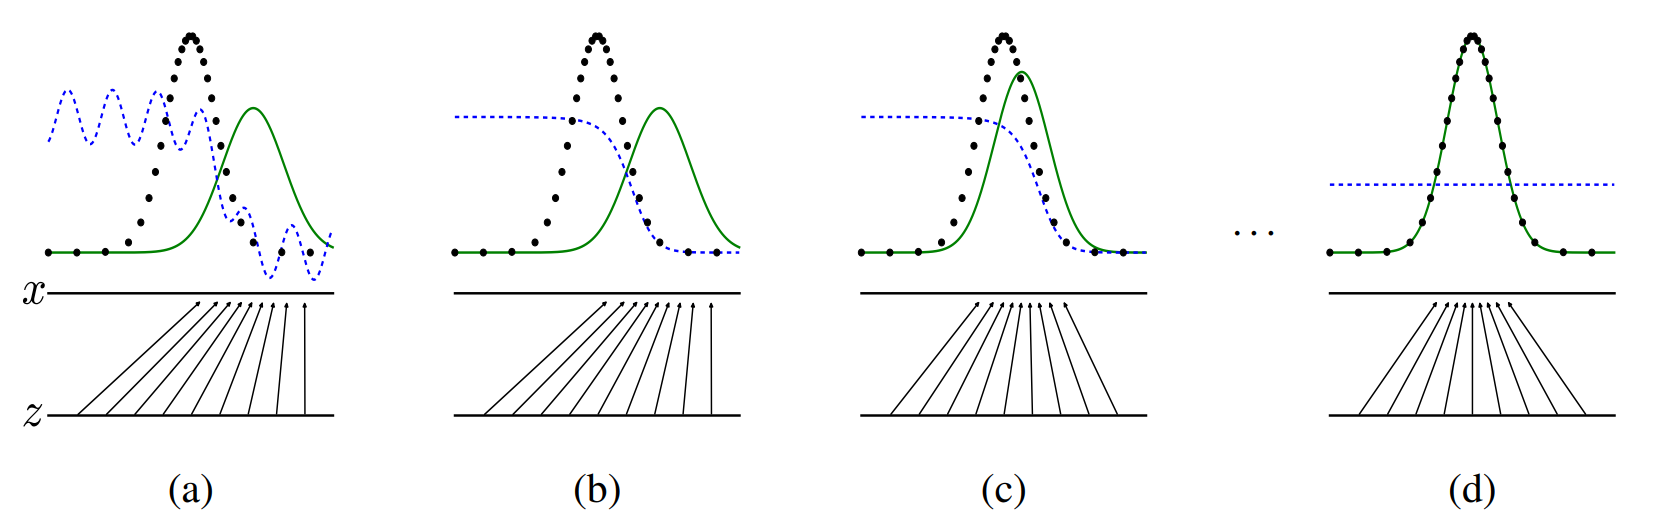

The figure explains how a Generative Adversarial Network (GAN) is trained to align the generative distribution $p_g$ (produced by the generator, $G$) with the data distribution $p_{\text{data}}$ (representing real data) by using the discriminator, $D$.

Each subplot $(a, b, c, d)$ shows a different stage in the training process, depicting:
- $z$: Input latent space sampled from a prior distribution (e.g., uniform or Gaussian).
- $x$: The output data space where real and generated samples exist.
- $p_{\text{data}}$ (black, dotted line): The real data distribution.
- $p_g$ (green, solid line): The generated data distribution.
- $D(x)$ (blue, dashed line): The discriminator’s estimate of the probability that a sample is real (from $p_{\text{data}}$) rather than generated.
- The arrows represent how the generator $G$ maps latent variables $z$ into $x$.

## 3.1. Initial State
- **Description**:
  - At the beginning of training, $p_g$ (green line) is far from $p_{\text{data}}$.
  - The generator $G$ produces samples distributed according to $p_g$, which does not align with $p_{\text{data}}$.
  - The discriminator $D$ is a partially accurate classifier: It can easily distinguish between real samples (near the peaks of $p_{\text{data}}$) and fake samples (areas with high $p_g$ but low $p_{\text{data}}$).

- **Training**:
  - $D$ is trained to output values close to 1 for real data (from $p_{\text{data}}$) and 0 for generated data (from $p_g$).
  - At this stage, $D$ is effective at distinguishing between real and generated samples.

## 3.2. Discriminator Learns
- **Description**:
  - The discriminator $D$ improves and becomes more accurate.
  - In this inner loop of the GAN algorithm:
    - $D$ is trained to discriminate between real and fake samples.
    - $D^*(x)$, the optimal discriminator, converges to:
      $$
      D^*(x) = \frac{p_{\text{data}}(x)}{p_{\text{data}}(x) + p_g(x)}
      $$
  - $D^*(x)$ reflects the likelihood that a sample belongs to $p_{\text{data}}$ rather than $p_g$.

- **Impact**:
  - The generator $G$ receives gradients from $D$ that guide it toward producing samples that better mimic $p_{\text{data}}$: $p_g$ moves closer to $p_{\text{data}}$.
    $$
    \nabla_{\theta_g} V(D, G) = \nabla_{\theta_g} \left[ \mathbb{E}_{x \sim p_{\text{data}}(x)} [\log D(x)] + \mathbb{E}_{z \sim p_z(z)} [\log (1 - D(G(z, \theta_g)))] \right]
    $$
    $$
    \theta_g \leftarrow \theta_g + \alpha \nabla_{\theta_g} V(D, G)
    $$
  - The generator learns to "fool" the discriminator by generating data closer to $p_{\text{data}}$.

## 3.3. Generator Imporves
- **Description**:
  - After several updates to the generator $G$, $p_g$ begins to align more closely with $p_{\text{data}}$.
  - The gradient from $D$ has guided $G$ to generate samples that flow toward regions where $p_{\text{data}}$ is high.
  - Areas where $p_g$ had low density are now filled in as $G$ learns to map $z$ more effectively to $x$.

- **Impact**:
  - $G$ contracts in regions where $p_{\text{data}}$ is dense and expands in regions where $p_{\text{data}}$ is sparse.
  - The discriminator $D$ still attempts to differentiate between the two distributions but becomes less confident as $p_g$ improves.

## 3.4. Near Convergence
- **Description**:
  - After sufficient training, $p_g$ nearly matches $p_{\text{data}}$.
  - At this point:
    - $D$ cannot reliably distinguish between real and generated data because the two distributions are identical.
    - The optimal discriminator output converges to:
      $$
      D(x) = \frac{1}{2}.
      $$
  - This represents equilibrium in the adversarial game: both $G$ and $D$ cannot improve further.

- **Impact**:
  - The generator $G$ produces samples that are indistinguishable from real data.
  - The discriminator $D$ is no longer effective because the generated samples perfectly mimic the real data distribution.

## Summary of the Process
1. The generator $G$ starts by producing poor approximations of the real data distribution.
2. The discriminator $D$ learns to distinguish real from fake data effectively.
3. The generator $G$ improves by using feedback (gradients) from $D$, gradually aligning $p_g$ with $p_{\text{data}}$.
4. At convergence, $G$ generates data indistinguishable from the real data, and $D$ outputs $D(x) = 0.5$ for all inputs, unable to differentiate between $p_g$ and $p_{\text{data}}$.

This adversarial training process is the core idea of GANs, leading to high-quality data generation. Let me know if you need further clarification!